# Visualization in Python

There are many libraries available:

- matplotlib
- seaborn
- bokeh
- altair
- plotly
- dash
- streamlit
- ggplot
- smplot

# Matplotlib

There are two ways to use matplotlib.

- Axes API (for advanced usage)
- pyplot API (recommended for beginners)

## Backend

The backend governs the low level process of generating your visualization. Python supports many different backends.

We would like our plots to appear in the Jupyter notebook itself. So we are going to choose a backend that does just that.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Generating some sample data.

In [5]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

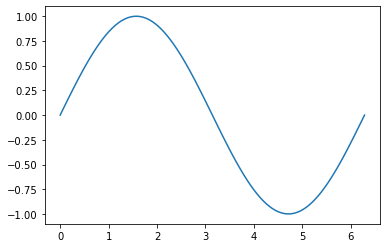

In [6]:
plt.plot(x, y)

We can change various attributes of the plot.

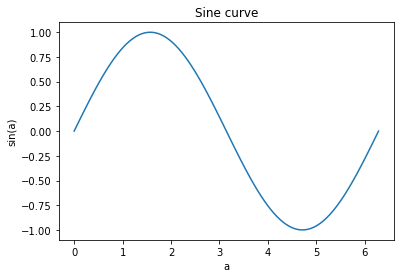

In [10]:
plt.plot(x, y)
plt.xlabel("a")
plt.ylabel("sin(a)")
plt.title("Sine curve")
plt.show()

Changing the colors, symbols etc.

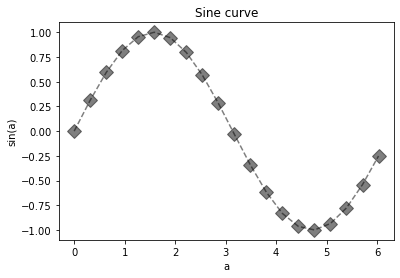

In [32]:
plt.plot(x[::5], y[::5], color='black', marker='D', ms=10,
        linestyle='dashed', alpha=0.5)
plt.xlabel("a")
plt.ylabel("sin(a)")
plt.title("Sine curve")
plt.show()

You can use math symbols using LaTeX.

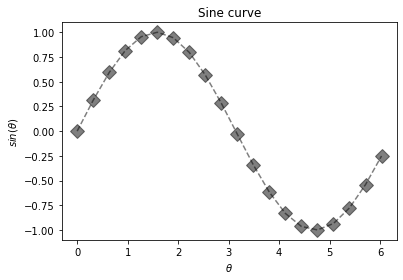

In [33]:
plt.plot(x[::5], y[::5], color='black', marker='D', ms=10,
        linestyle='dashed', alpha=0.5)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$sin(\theta)$")
plt.title("Sine curve")
plt.show()

## Histograms

In [34]:
x = np.random.normal(78, 6, 1000)

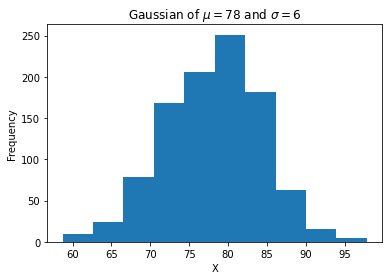

In [35]:
plt.hist(x)
plt.xlabel("X")
plt.ylabel("Frequency")
plt.title(r"Gaussian of $\mu = 78$ and $\sigma = 6$")
plt.show()

You can control the number of bins, you can change color and transparency and so on...

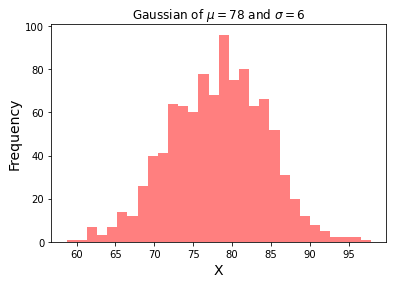

In [39]:
plt.hist(x, color='red', alpha=0.5, bins=30)
plt.xlabel("X", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(r"Gaussian of $\mu = 78$ and $\sigma = 6$")
plt.show()

# Seaborn

In [40]:
import seaborn as sns

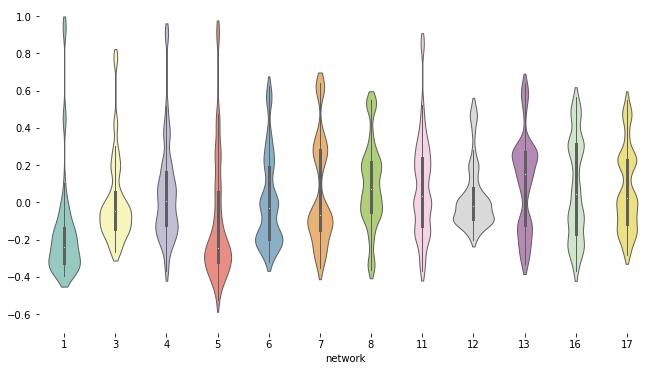

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

## Saving

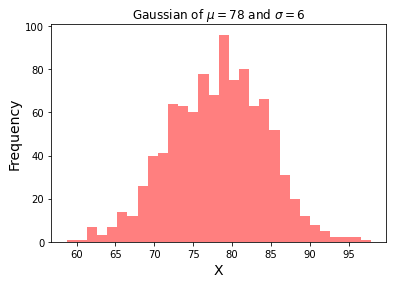

In [43]:
plt.hist(x, color='red', alpha=0.5, bins=30)
plt.xlabel("X", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(r"Gaussian of $\mu = 78$ and $\sigma = 6$")
plt.savefig("something.pdf", dpi=600)

# Pandas and matplotlib

In [44]:
import pandas as pd

In [45]:
df = pd.read_csv("C:/Users/kaustubh_vaghmare/Desktop/housing.csv")

In [46]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


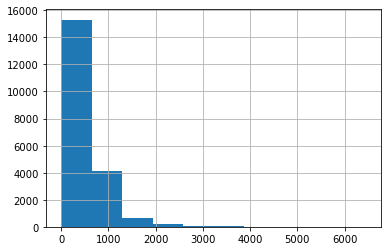

In [48]:
df['total_bedrooms'].hist()

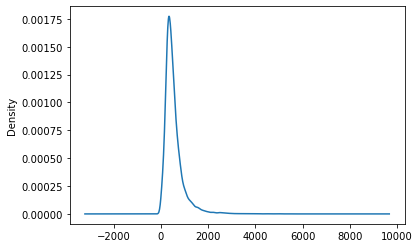

In [51]:
df['total_bedrooms'].plot(kind='kde')